In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gemstone-price-prediction/cubic_zirconia.csv
/kaggle/input/gemstone-price-prediction/Data Dictionary.xlsx


In [2]:
df=pd.read_csv('../input/gemstone-price-prediction/cubic_zirconia.csv')
df.shape

(26967, 11)

## EDA

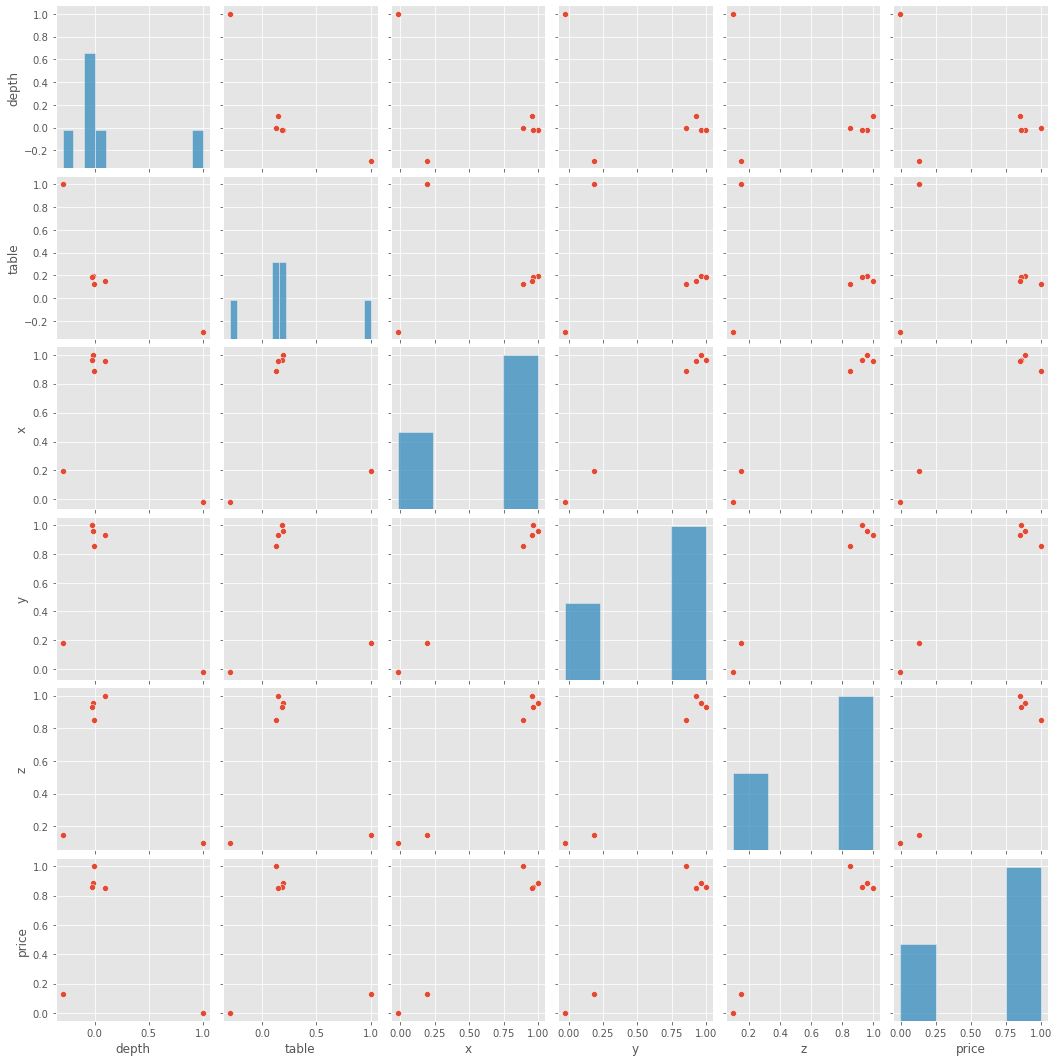

In [16]:
sns.pairplot(df.corr())

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [5]:
df=df.iloc[:, 1:]

In [25]:
df.corr()

,depth,table,x,y,z,price
depth,1.000000,-0.293728,-0.018175,-0.024168,0.097633,-0.002876
table,-0.293728,1.000000,0.196250,0.182348,0.148989,0.126839
x,-0.018175,0.196250,1.000000,0.962599,0.956487,0.886552
y,-0.024168,0.182348,0.962599,1.000000,0.928721,0.856437
z,0.097633,0.148989,0.956487,0.928721,1.000000,0.850679
price,-0.002876,0.126839,0.886552,0.856437,0.850679,1.000000


<AxesSubplot:>

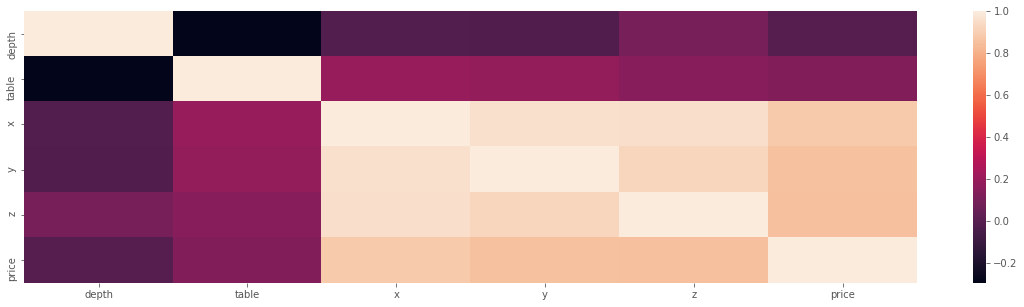

In [26]:
sns.heatmap(df.corr())



## Dealing with missing value

In [6]:
#show the information about dataset
df_dtype=df.dtypes
df_missing=df.isna().mean().round(4)*100
df_desc = df.describe(include='all')
dtls_1=pd.DataFrame(df_missing, columns=['missing'])
dtls_2=pd.DataFrame(df_dtype, columns=['dtype'])
dtls_3=pd.DataFrame(df_desc)
dtls_3=dtls_3.T
dtls=pd.concat([dtls_1, dtls_2, dtls_3], axis=1)
dtls.sort_values(by='missing', ascending=False)

,missing,dtype,count,unique,top,freq,mean,std,min,25%,50%,75%,max
depth,2.58,float64,26270.0,NaN,NaN,NaN,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
cut,0.00,object,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,0.00,object,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,0.00,object,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
table,0.00,float64,26967.0,NaN,NaN,NaN,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,0.00,float64,26967.0,NaN,NaN,NaN,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,0.00,float64,26967.0,NaN,NaN,NaN,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,0.00,float64,26967.0,NaN,NaN,NaN,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,0.00,int64,26967.0,NaN,NaN,NaN,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [7]:
# now we have to dind out how many number of value is missing for this we cereate a function
def find_missing_percent(dataframe):
    """
        Input = get a dataframe in which you want to find the missing value
        return = total missing percentage
    """
    percent_nan = 100 * dataframe.isnull().sum() / len(dataframe)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    
    return percent_nan

In [8]:
missing_per = find_missing_percent(df)

In [10]:
missing_per

depth    2.58464
dtype: float64

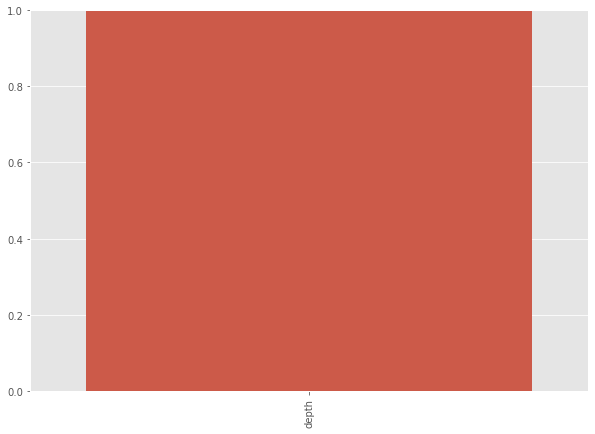

In [11]:
# now we can plot our missing percentage af values so we can remove or replace acc to our need
plt.figure(figsize=(10,7))
sns.barplot(x = missing_per.index, y = missing_per)
plt.xticks(rotation=90)
plt.ylim(0,1);

**from above we can say that we have only depth which contain missing value so we can replace with it mean values**

In [13]:
df['depth'].fillna(df['depth'].mean(), inplace=True)

### Let's drop duplicates

In [14]:
print(f'before removing duplicates{df.shape}')
df.drop_duplicates(inplace=True)
print(f'after removing duplicates{df.shape}')

before removing duplicates(26967, 9)
after removing duplicates(26932, 9)


### Univariate Analysis

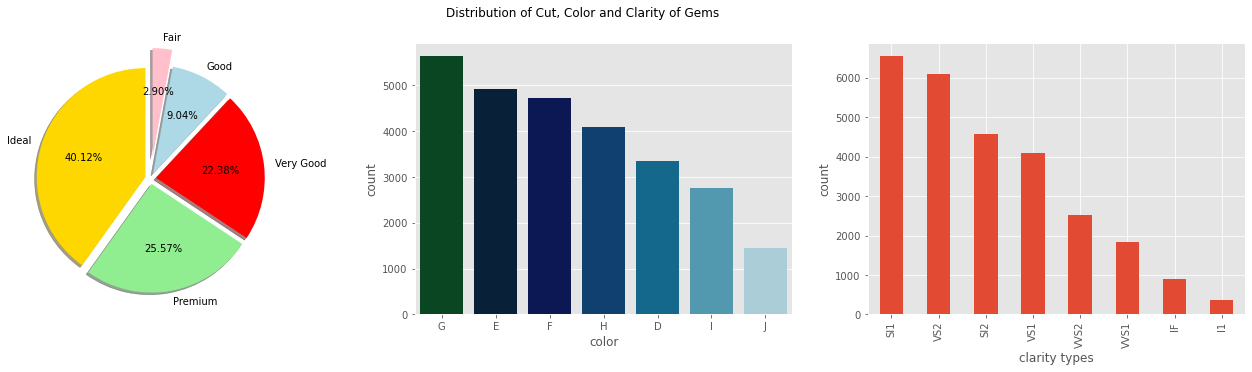

In [17]:
plt.rcParams['figure.figsize']=23,5
plt.subplot(131)
plt.pie(df['cut'].value_counts().values,
        labels=df['cut'].value_counts().index,
        startangle=90,
        colors=['gold', 'lightgreen', 'red', 'lightblue', 'pink'],
        explode=[0.05,0.05,0.05,0.05,0.2],
        shadow=True, autopct='%1.2f%%')
plt.subplot(132)
sns.countplot(df['color'], palette='ocean', order=df['color'].value_counts().index)

plt.subplot(133)
df["clarity"].value_counts().plot.bar()
plt.xlabel('clarity types')
plt.ylabel('count')


plt.suptitle('Distribution of Cut, Color and Clarity of Gems')
plt.show()

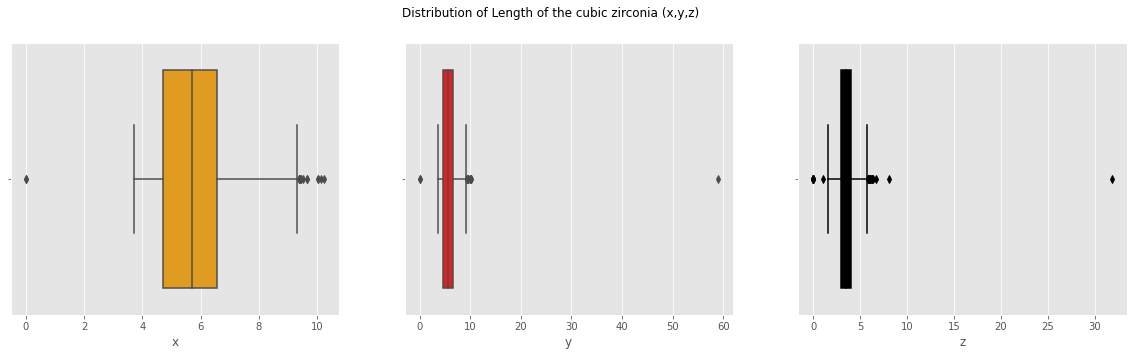

In [19]:
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.boxplot(df['x'], color='orange')

plt.subplot(132)
sns.boxplot(df['y'], color='red')

plt.subplot(133)
sns.boxplot(df['z'], color='black')

plt.suptitle('Distribution of Length of the cubic zirconia (x,y,z)')
plt.show()

In [20]:
df.head()

,cut,color,clarity,depth,table,x,y,z,price
0,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


**Matrix scatterplot**

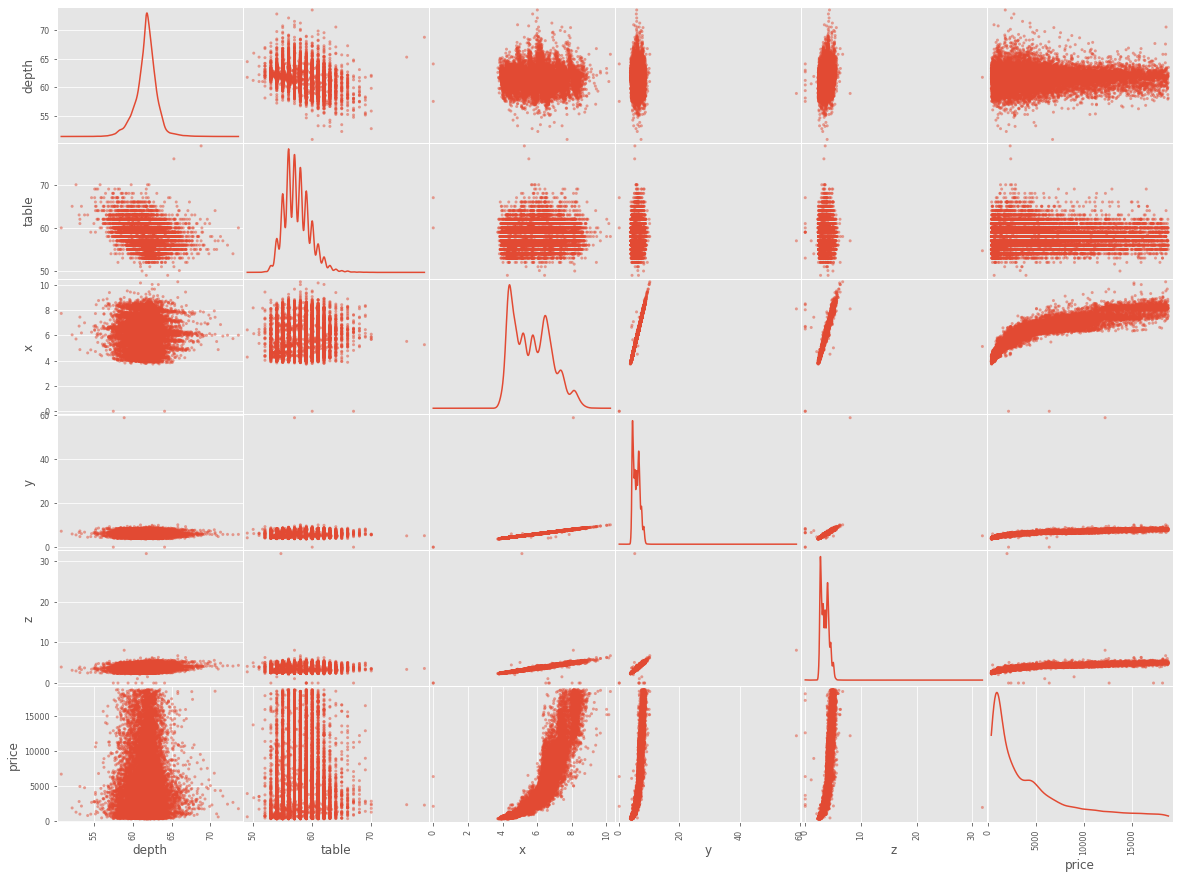

In [22]:
pd.plotting.scatter_matrix(df.loc[:, "cut":"price"], diagonal="kde",figsize=(20,15))
plt.show()